<a href="https://colab.research.google.com/github/TakumiML/stainless/blob/main/stainless_LightGBM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightGBMで試してみる

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
!pip install optuna-integration

In [119]:
import pandas as pd
import numpy as np


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/train.tsv', sep='\t')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/test.tsv', sep='\t')
sample  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/sample_submit.csv',header=None)

In [120]:
train.head()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,0,137,170,301492,301511,304,59,26,35778,111,...,0.5593,0.7308,0.0,2.4829,1.5185,1.2787,-0.4242,-0.0805,0.8971,7
1,3,188,198,3942253,3942263,74,11,10,8375,95,...,0.9091,1.0000,0.5,1.8692,1.0000,1.0000,0.0000,-0.1158,0.2061,6
2,7,492,506,169603,169617,110,21,16,20245,178,...,0.6667,0.8750,0.5,2.0414,1.1461,1.1461,0.0000,0.4379,0.3300,7
3,11,81,90,2082327,2082338,60,13,11,6133,91,...,0.6923,1.0000,1.0,1.7781,0.9542,1.0414,0.1818,-0.2014,0.2051,2
4,12,625,636,1997356,1997506,1082,102,150,118721,94,...,0.1078,1.0000,1.0,3.0342,1.0414,2.1761,0.9267,-0.1428,0.9999,5


In [121]:
train.describe(include='all')

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
count,970.000000,970.000000,970.000000,9.700000e+02,9.700000e+02,970.000000,970.000000,970.000000,9.700000e+02,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.00000,970.000000
mean,975.690722,589.434021,632.511340,1.621114e+06,1.621178e+06,1884.450515,112.354639,91.329897,2.022396e+05,84.646392,...,0.600218,0.815005,0.594330,2.487654,1.323065,1.409382,0.101764,-0.133572,0.58442,4.752577
std,561.763824,529.412762,506.500644,1.756813e+06,1.756838e+06,6105.586629,377.297615,591.553201,5.587114e+05,32.123435,...,0.245668,0.230244,0.479313,0.778851,0.465065,0.460966,0.501942,0.148973,0.33874,2.209516
min,0.000000,0.000000,8.000000,7.003000e+03,7.020000e+03,6.000000,3.000000,2.000000,7.180000e+02,0.000000,...,0.014400,0.131200,0.000000,0.778200,0.477100,0.301000,-0.954600,-0.998900,0.12400,1.000000
25%,490.500000,62.000000,192.250000,4.692265e+05,4.693912e+05,85.000000,15.000000,14.000000,9.923750e+03,63.000000,...,0.400000,0.594000,0.000000,1.929400,1.000000,1.079200,-0.272700,-0.194750,0.24945,3.000000
50%,967.500000,469.500000,504.500000,1.161958e+06,1.161970e+06,172.000000,27.000000,25.000000,1.911700e+04,91.000000,...,0.627650,0.947850,1.000000,2.235500,1.176100,1.322200,0.108200,-0.132000,0.49630,6.000000
75%,1469.750000,1068.000000,1085.000000,2.134671e+06,2.134691e+06,830.000000,79.750000,83.000000,7.742500e+04,107.000000,...,0.785700,1.000000,1.000000,2.919050,1.505100,1.740400,0.532325,-0.069200,0.99980,7.000000
max,1939.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,195.000000,...,1.000000,1.000000,1.000000,5.183700,2.933500,4.258700,0.991700,0.591600,1.00000,7.000000


In [122]:
test.describe(include='all')

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,971.000000,971.000000,971.000000,9.710000e+02,9.710000e+02,971.000000,971.000000,971.000000,9.710000e+02,971.000000,...,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,964.315139,552.856849,603.432544,1.680225e+06,1.680269e+06,1903.296601,111.356334,74.610711,2.103805e+05,84.451081,...,0.036087,0.620829,0.811941,0.557158,2.497118,1.348294,1.397167,0.064830,-0.129041,0.586420
std,559.391643,511.448272,488.430801,1.792568e+06,1.792566e+06,4023.184534,198.107840,118.579187,4.615406e+05,32.161359,...,0.065868,0.240549,0.238340,0.484904,0.799245,0.497512,0.447788,0.499369,0.148603,0.340333
min,1.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,...,0.001500,0.064500,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.860300,0.119000
25%,482.500000,47.500000,192.000000,4.741640e+05,4.741815e+05,83.000000,14.000000,13.000000,9.256500e+03,63.000000,...,0.006600,0.434500,0.604350,0.000000,1.919100,1.000000,1.079200,-0.340550,-0.195350,0.245700
50%,971.000000,395.000000,442.000000,1.242405e+06,1.242592e+06,176.000000,26.000000,25.000000,1.954900e+04,89.000000,...,0.009600,0.643600,0.947400,1.000000,2.245500,1.176100,1.322200,0.083300,-0.133900,0.529600
75%,1440.500000,1031.000000,1051.500000,2.207962e+06,2.207972e+06,808.500000,89.000000,83.000000,8.405900e+04,105.000000,...,0.024300,0.805700,1.000000,1.000000,2.907650,1.531500,1.724300,0.486300,-0.065450,0.999800
max,1940.000000,1687.000000,1694.000000,1.291703e+07,1.291709e+07,25473.000000,1275.000000,696.000000,3.061597e+06,203.000000,...,0.875900,1.000000,1.000000,1.000000,4.406100,3.074100,2.776000,0.960700,0.642100,1.000000


In [123]:
#欠損確認
train.isnull().all()

Unnamed: 0               False
X_Minimum                False
X_Maximum                False
Y_Minimum                False
Y_Maximum                False
Pixels_Areas             False
X_Perimeter              False
Y_Perimeter              False
Sum_of_Luminosity        False
Minimum_of_Luminosity    False
Maximum_of_Luminosity    False
Length_of_Conveyer       False
TypeOfSteel_A300         False
TypeOfSteel_A400         False
Steel_Plate_Thickness    False
Edges_Index              False
Empty_Index              False
Square_Index             False
Outside_X_Index          False
Edges_X_Index            False
Edges_Y_Index            False
Outside_Global_Index     False
LogOfAreas               False
Log_X_Index              False
Log_Y_Index              False
Orientation_Index        False
Luminosity_Index         False
SigmoidOfAreas           False
Class                    False
dtype: bool

<Axes: >

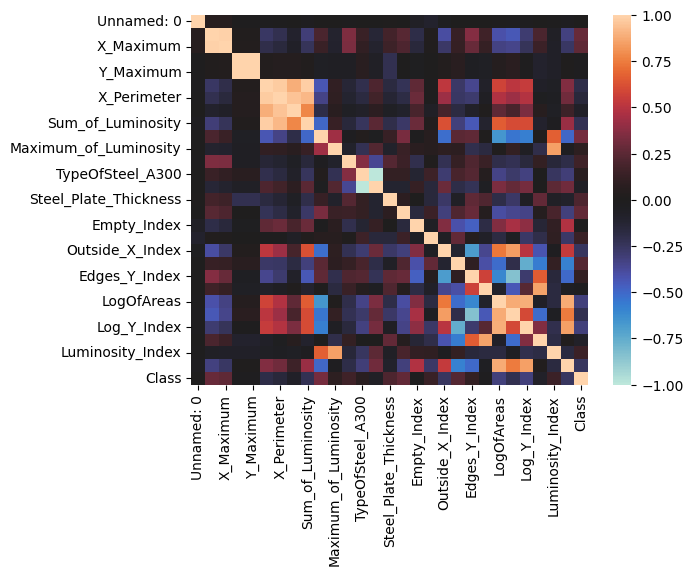

In [124]:
#ヒートマップ
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = train.corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [125]:
data_x = train.drop('Class', axis=1)

data_y = train[['Class']]


In [126]:
#重要度算出
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10000)
rf_reg = rf_reg.fit(data_x, data_y)

fti = rf_reg.feature_importances_

dic_arr = {'importance':fti, 'feature':data_x.columns.values}
pd.DataFrame(dic_arr).sort_values('importance', ascending=False).reset_index(drop=True).loc[:15, :]

,importance,feature
0,0.132751,X_Minimum
1,0.087497,Length_of_Conveyer
2,0.079780,Steel_Plate_Thickness
3,0.066403,Orientation_Index
4,0.062657,Minimum_of_Luminosity
5,0.057154,Log_Y_Index
6,0.047885,X_Maximum
7,0.046432,Empty_Index
8,0.032457,Outside_X_Index
9,0.030633,Edges_Index


In [127]:
feature_x = data_x.columns.values
feature_y = data_y.columns.values

In [128]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state = 0)

#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('Class', axis=1)
y_train = train_set[['Class']]

#評価データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('Class', axis=1)
y_test = test_set[['Class']]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(776, 28)
(194, 28)
(776, 1)
(194, 1)


In [129]:
#Classが1~７の分類のため、-1する
y_train['Class'] -= 1
y_test['Class'] -= 1
y_test

,Class
933,5
279,0
14,2
681,1
458,0
...,...
580,2
489,6
18,0
420,5


In [130]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb

# 訓練データ
lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
# 評価データ
lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

# 固定するパラメータ
params = {
    "boosting_type": "gbdt",
    'objective': 'multiclass',
    'num_class':7,
    'metric': 'multi_logloss',
    "verbosity": -1,
    'verbose': -1,
}

# Optunaでのパラメータ探索
model = lgb.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=100,              # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=1),
                               lgb.log_evaluation(10),],         # アーリーストッピング設定

                 )

# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)



[I 2024-05-11 07:11:51,965] A new study created in memory with name: no-name-bc1eed9c-dfb1-499e-be3b-eb20db95cda6
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.536404	valid_1's multi_logloss: 0.882462
[20]	valid_0's multi_logloss: 0.239126	valid_1's multi_logloss: 0.738836
[30]	valid_0's multi_logloss: 0.111605	valid_1's multi_logloss: 0.715496
[40]	valid_0's multi_logloss: 0.0526832	valid_1's multi_logloss: 0.720951
[50]	valid_0's multi_logloss: 0.0258041	valid_1's multi_logloss: 0.74794
[60]	valid_0's multi_logloss: 0.0125769	valid_1's multi_logloss: 0.792168
[70]	valid_0's multi_logloss: 0.00630139	valid_1's multi_logloss: 0.841577
[80]	valid_0's multi_logloss: 0.00316803	valid_1's multi_logloss: 0.893532


feature_fraction, val_score: 0.708923:  14%|#4        | 1/7 [00:04<00:25,  4.19s/it]

Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.061049	valid_1's multi_logloss: 0.708923
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.573951	valid_1's multi_logloss: 0.917674
[20]	valid_0's multi_logloss: 0.269205	valid_1's multi_logloss: 0.75357
[30]	valid_0's multi_logloss: 0.132865	valid_1's multi_logloss: 0.70195
[40]	valid_0's multi_logloss: 0.0672285	valid_1's multi_logloss: 0.700771
[50]	valid_0's multi_logloss: 0.0355105	valid_1's multi_logloss: 0.737519
[60]	valid_0's multi_logloss: 0.0189046	valid_1's multi_logloss: 0.776408


feature_fraction, val_score: 0.696979:  29%|##8       | 2/7 [00:04<00:10,  2.08s/it]

[70]	valid_0's multi_logloss: 0.0099688	valid_1's multi_logloss: 0.817697
[80]	valid_0's multi_logloss: 0.00523082	valid_1's multi_logloss: 0.857804
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.0880209	valid_1's multi_logloss: 0.696979
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.528508	valid_1's multi_logloss: 0.872142
[20]	valid_0's multi_logloss: 0.231161	valid_1's multi_logloss: 0.749319
[30]	valid_0's multi_logloss: 0.104955	valid_1's multi_logloss: 0.707241
[40]	valid_0's multi_logloss: 0.050228	valid_1's multi_logloss: 0.726424
[50]	valid_0's multi_logloss: 0.0247476	valid_1's multi_logloss: 0.76929
[60]	valid_0's multi_logloss: 0.0118807	valid_1's multi_logloss: 0.809324
[70]	valid_0's multi_logloss: 0.00580681	valid_1's multi_logloss: 0.869472


feature_fraction, val_score: 0.696979:  43%|####2     | 3/7 [00:05<00:06,  1.54s/it]

[80]	valid_0's multi_logloss: 0.00284726	valid_1's multi_logloss: 0.940949
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.0838192	valid_1's multi_logloss: 0.698548
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.536534	valid_1's multi_logloss: 0.881701
[20]	valid_0's multi_logloss: 0.242063	valid_1's multi_logloss: 0.741812
[30]	valid_0's multi_logloss: 0.113712	valid_1's multi_logloss: 0.734078
[40]	valid_0's multi_logloss: 0.0548928	valid_1's multi_logloss: 0.73935
[50]	valid_0's multi_logloss: 0.0271096	valid_1's multi_logloss: 0.768008
[60]	valid_0's multi_logloss: 0.0132662	valid_1's multi_logloss: 0.824043


feature_fraction, val_score: 0.696979:  57%|#####7    | 4/7 [00:10<00:08,  3.00s/it]

[70]	valid_0's multi_logloss: 0.00656805	valid_1's multi_logloss: 0.891423
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.178663	valid_1's multi_logloss: 0.726578
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.556579	valid_1's multi_logloss: 0.890071
[20]	valid_0's multi_logloss: 0.253225	valid_1's multi_logloss: 0.738327
[30]	valid_0's multi_logloss: 0.121896	valid_1's multi_logloss: 0.692995
[40]	valid_0's multi_logloss: 0.0603487	valid_1's multi_logloss: 0.706343
[50]	valid_0's multi_logloss: 0.0312205	valid_1's multi_logloss: 0.729032
[60]	valid_0's multi_logloss: 0.0159727	valid_1's multi_logloss: 0.780413
[70]	valid_0's multi_logloss: 0.00844967	valid_1's multi_logloss: 0.837786


feature_fraction, val_score: 0.692238:  71%|#######1  | 5/7 [00:16<00:08,  4.05s/it]

[80]	valid_0's multi_logloss: 0.00436423	valid_1's multi_logloss: 0.8964
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.113427	valid_1's multi_logloss: 0.692238
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.530781	valid_1's multi_logloss: 0.866874
[20]	valid_0's multi_logloss: 0.230364	valid_1's multi_logloss: 0.727572
[30]	valid_0's multi_logloss: 0.103532	valid_1's multi_logloss: 0.689121
[40]	valid_0's multi_logloss: 0.0494758	valid_1's multi_logloss: 0.699435
[50]	valid_0's multi_logloss: 0.0236573	valid_1's multi_logloss: 0.745791
[60]	valid_0's multi_logloss: 0.0114501	valid_1's multi_logloss: 0.783848
[70]	valid_0's multi_logloss: 0.00555582	valid_1's multi_logloss: 0.838936


feature_fraction, val_score: 0.689121:  86%|########5 | 6/7 [00:25<00:05,  5.60s/it]

[80]	valid_0's multi_logloss: 0.00276916	valid_1's multi_logloss: 0.906714
Early stopping, best iteration is:
[30]	valid_0's multi_logloss: 0.103532	valid_1's multi_logloss: 0.689121
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853712
[20]	valid_0's multi_logloss: 0.244335	valid_1's multi_logloss: 0.721859
[30]	valid_0's multi_logloss: 0.114778	valid_1's multi_logloss: 0.694122
[40]	valid_0's multi_logloss: 0.0558121	valid_1's multi_logloss: 0.696657
[50]	valid_0's multi_logloss: 0.0277811	valid_1's multi_logloss: 0.721779
[60]	valid_0's multi_logloss: 0.0141081	valid_1's multi_logloss: 0.756165
[70]	valid_0's multi_logloss: 0.00736482	valid_1's multi_logloss: 0.813936


feature_fraction, val_score: 0.688847: 100%|##########| 7/7 [00:31<00:00,  4.44s/it]


[80]	valid_0's multi_logloss: 0.00376638	valid_1's multi_logloss: 0.859062
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.106755	valid_1's multi_logloss: 0.688847


num_leaves, val_score: 0.688847:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333


num_leaves, val_score: 0.687852:   5%|5         | 1/20 [00:05<01:41,  5.33s/it]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  10%|#         | 2/20 [00:06<00:48,  2.70s/it]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  15%|#5        | 3/20 [00:07<00:31,  1.85s/it]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.569568	valid_1's multi_logloss: 0.86782
[20]	valid_0's multi_logloss: 0.28229	valid_1's multi_logloss: 0.728565
[30]	valid_0's multi_logloss: 0.150297	valid_1's multi_logloss: 0.698047
[40]	valid_0's multi_logloss: 0.0842844	valid_1's multi_logloss: 0.707408
[50]	valid_0's multi_logloss: 0.0485106	valid_1's multi_logloss: 0.732089


num_leaves, val_score: 0.687852:  20%|##        | 4/20 [00:07<00:21,  1.32s/it]

[60]	valid_0's multi_logloss: 0.0283196	valid_1's multi_logloss: 0.759111
[70]	valid_0's multi_logloss: 0.016827	valid_1's multi_logloss: 0.810685
[80]	valid_0's multi_logloss: 0.0101823	valid_1's multi_logloss: 0.845838
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.126518	valid_1's multi_logloss: 0.69177
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333


num_leaves, val_score: 0.687852:  25%|##5       | 5/20 [00:08<00:17,  1.15s/it]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  30%|###       | 6/20 [00:09<00:14,  1.05s/it]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  35%|###5      | 7/20 [00:10<00:12,  1.03it/s]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282


num_leaves, val_score: 0.687852:  40%|####      | 8/20 [00:10<00:11,  1.08it/s]

[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  45%|####5     | 9/20 [00:11<00:09,  1.11it/s]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282


num_leaves, val_score: 0.687852:  50%|#####     | 10/20 [00:12<00:08,  1.13it/s]

[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  55%|#####5    | 11/20 [00:13<00:08,  1.09it/s]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852


num_leaves, val_score: 0.687852:  60%|######    | 12/20 [00:17<00:14,  1.79s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333


num_leaves, val_score: 0.687852:  65%|######5   | 13/20 [00:18<00:10,  1.52s/it]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  70%|#######   | 14/20 [00:19<00:07,  1.31s/it]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282


num_leaves, val_score: 0.687852:  75%|#######5  | 15/20 [00:19<00:05,  1.17s/it]

[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333


num_leaves, val_score: 0.687852:  80%|########  | 16/20 [00:20<00:04,  1.09s/it]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722932
[30]	valid_0's multi_logloss: 0.116258	valid_1's multi_logloss: 0.702598
[40]	valid_0's multi_logloss: 0.0570274	valid_1's multi_logloss: 0.712956
[50]	valid_0's multi_logloss: 0.0281159	valid_1's multi_logloss: 0.755205
[60]	valid_0's multi_logloss: 0.0138575	valid_1's multi_logloss: 0.794158
[70]	valid_0's multi_logloss: 0.00691176	valid_1's multi_logloss: 0.840732


num_leaves, val_score: 0.687852:  85%|########5 | 17/20 [00:21<00:02,  1.00it/s]

[80]	valid_0's multi_logloss: 0.00344384	valid_1's multi_logloss: 0.87661
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.107442	valid_1's multi_logloss: 0.699395
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694


num_leaves, val_score: 0.687852:  90%|######### | 18/20 [00:22<00:01,  1.05it/s]

[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282


num_leaves, val_score: 0.687852:  95%|#########5| 19/20 [00:23<00:00,  1.09it/s]

[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.54148	valid_1's multi_logloss: 0.853714
[20]	valid_0's multi_logloss: 0.244529	valid_1's multi_logloss: 0.722937
[30]	valid_0's multi_logloss: 0.115427	valid_1's multi_logloss: 0.695454
[40]	valid_0's multi_logloss: 0.0563785	valid_1's multi_logloss: 0.698672
[50]	valid_0's multi_logloss: 0.028133	valid_1's multi_logloss: 0.730903
[60]	valid_0's multi_logloss: 0.0139623	valid_1's multi_logloss: 0.774282
[70]	valid_0's multi_logloss: 0.00713394	valid_1's multi_logloss: 0.820694
[80]	valid_0's multi_logloss: 0.00357477	valid_1's multi_logloss: 0.870333


num_leaves, val_score: 0.687852: 100%|##########| 20/20 [00:24<00:00,  1.21s/it]


Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.069908	valid_1's multi_logloss: 0.687852


bagging, val_score: 0.687852:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.621904	valid_1's multi_logloss: 0.891929
[20]	valid_0's multi_logloss: 0.324877	valid_1's multi_logloss: 0.749864
[30]	valid_0's multi_logloss: 0.177114	valid_1's multi_logloss: 0.708034
[40]	valid_0's multi_logloss: 0.0997033	valid_1's multi_logloss: 0.730756
[50]	valid_0's multi_logloss: 0.0547067	valid_1's multi_logloss: 0.751441
[60]	valid_0's multi_logloss: 0.0331369	valid_1's multi_logloss: 0.785688
[70]	valid_0's multi_logloss: 0.0201418	valid_1's multi_logloss: 0.814359
[80]	valid_0's multi_logloss: 0.0124609	valid_1's multi_logloss: 0.838919
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.155695	valid_1's multi_logloss: 0.705602


bagging, val_score: 0.687852:  10%|#         | 1/10 [00:00<00:06,  1.42it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.744432	valid_1's multi_logloss: 0.985594
[20]	valid_0's multi_logloss: 0.467681	valid_1's multi_logloss: 0.806836
[30]	valid_0's multi_logloss: 0.316753	valid_1's multi_logloss: 0.751733
[40]	valid_0's multi_logloss: 0.225394	valid_1's multi_logloss: 0.722365
[50]	valid_0's multi_logloss: 0.161149	valid_1's multi_logloss: 0.731616
[60]	valid_0's multi_logloss: 0.114848	valid_1's multi_logloss: 0.739171
[70]	valid_0's multi_logloss: 0.0849794	valid_1's multi_logloss: 0.774229
[80]	valid_0's multi_logloss: 0.0629528	valid_1's multi_logloss: 0.785791


bagging, val_score: 0.687852:  20%|##        | 2/10 [00:01<00:05,  1.59it/s]

[90]	valid_0's multi_logloss: 0.0463201	valid_1's multi_logloss: 0.80429
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.170425	valid_1's multi_logloss: 0.717122
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.568073	valid_1's multi_logloss: 0.907342
[20]	valid_0's multi_logloss: 0.270601	valid_1's multi_logloss: 0.782629
[30]	valid_0's multi_logloss: 0.133055	valid_1's multi_logloss: 0.747962
[40]	valid_0's multi_logloss: 0.0667647	valid_1's multi_logloss: 0.761589
[50]	valid_0's multi_logloss: 0.0344721	valid_1's multi_logloss: 0.801611
[60]	valid_0's multi_logloss: 0.0183994	valid_1's multi_logloss: 0.840317
[70]	valid_0's multi_logloss: 0.0097321	valid_1's multi_logloss: 0.873122


bagging, val_score: 0.687852:  30%|###       | 3/10 [00:02<00:04,  1.40it/s]

[80]	valid_0's multi_logloss: 0.00520284	valid_1's multi_logloss: 0.900101
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.123551	valid_1's multi_logloss: 0.744896
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.769178	valid_1's multi_logloss: 0.987487
[20]	valid_0's multi_logloss: 0.49551	valid_1's multi_logloss: 0.798615
[30]	valid_0's multi_logloss: 0.338519	valid_1's multi_logloss: 0.729915
[40]	valid_0's multi_logloss: 0.249509	valid_1's multi_logloss: 0.72152
[50]	valid_0's multi_logloss: 0.184278	valid_1's multi_logloss: 0.722223
[60]	valid_0's multi_logloss: 0.139375	valid_1's multi_logloss: 0.716339
[70]	valid_0's multi_logloss: 0.107732	valid_1's multi_logloss: 0.737927


bagging, val_score: 0.687852:  40%|####      | 4/10 [00:02<00:03,  1.57it/s]

[80]	valid_0's multi_logloss: 0.0827787	valid_1's multi_logloss: 0.765045
[90]	valid_0's multi_logloss: 0.0624223	valid_1's multi_logloss: 0.800302
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.213667	valid_1's multi_logloss: 0.709396
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.542074	valid_1's multi_logloss: 0.881608
[20]	valid_0's multi_logloss: 0.251164	valid_1's multi_logloss: 0.765935
[30]	valid_0's multi_logloss: 0.117452	valid_1's multi_logloss: 0.746666
[40]	valid_0's multi_logloss: 0.0582862	valid_1's multi_logloss: 0.751148
[50]	valid_0's multi_logloss: 0.0296298	valid_1's multi_logloss: 0.770028
[60]	valid_0's multi_logloss: 0.0151596	valid_1's multi_logloss: 0.821292
[70]	valid_0's multi_logloss: 0.00780452	valid_1's multi_logloss: 0.881119


bagging, val_score: 0.687852:  50%|#####     | 5/10 [00:03<00:04,  1.16it/s]

[80]	valid_0's multi_logloss: 0.00407267	valid_1's multi_logloss: 0.936609
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.0825132	valid_1's multi_logloss: 0.744036
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.657765	valid_1's multi_logloss: 0.906357
[20]	valid_0's multi_logloss: 0.364709	valid_1's multi_logloss: 0.767808
[30]	valid_0's multi_logloss: 0.206668	valid_1's multi_logloss: 0.74499
[40]	valid_0's multi_logloss: 0.124438	valid_1's multi_logloss: 0.764904
[50]	valid_0's multi_logloss: 0.0790943	valid_1's multi_logloss: 0.758472
[60]	valid_0's multi_logloss: 0.0500703	valid_1's multi_logloss: 0.786803


bagging, val_score: 0.687852:  50%|#####     | 5/10 [00:06<00:04,  1.16it/s]

[70]	valid_0's multi_logloss: 0.031792	valid_1's multi_logloss: 0.804165
Early stopping, best iteration is:
[27]	valid_0's multi_logloss: 0.247164	valid_1's multi_logloss: 0.744805


bagging, val_score: 0.687852:  60%|######    | 6/10 [00:06<00:06,  1.55s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.676172	valid_1's multi_logloss: 0.92107
[20]	valid_0's multi_logloss: 0.388786	valid_1's multi_logloss: 0.771064
[30]	valid_0's multi_logloss: 0.235176	valid_1's multi_logloss: 0.737044
[40]	valid_0's multi_logloss: 0.146235	valid_1's multi_logloss: 0.707968
[50]	valid_0's multi_logloss: 0.0946276	valid_1's multi_logloss: 0.748562
[60]	valid_0's multi_logloss: 0.0625571	valid_1's multi_logloss: 0.795082


bagging, val_score: 0.687852:  70%|#######   | 7/10 [00:07<00:04,  1.43s/it]

[70]	valid_0's multi_logloss: 0.0389018	valid_1's multi_logloss: 0.851851
[80]	valid_0's multi_logloss: 0.0247818	valid_1's multi_logloss: 0.859063
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.152383	valid_1's multi_logloss: 0.702711
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.59269	valid_1's multi_logloss: 0.885996
[20]	valid_0's multi_logloss: 0.295095	valid_1's multi_logloss: 0.752746
[30]	valid_0's multi_logloss: 0.15248	valid_1's multi_logloss: 0.718083
[40]	valid_0's multi_logloss: 0.0831046	valid_1's multi_logloss: 0.725195
[50]	valid_0's multi_logloss: 0.0474671	valid_1's multi_logloss: 0.755441
[60]	valid_0's multi_logloss: 0.0266604	valid_1's multi_logloss: 0.760109
[70]	valid_0's multi_logloss: 0.0148453	valid_1's multi_logloss: 0.805034
[80]	valid_0's multi_logloss: 0.00851917	valid_1's multi_logloss: 0.842174
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.126276	valid_1's multi_loglo

bagging, val_score: 0.687852:  80%|########  | 8/10 [00:08<00:02,  1.21s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.714451	valid_1's multi_logloss: 0.935823
[20]	valid_0's multi_logloss: 0.431415	valid_1's multi_logloss: 0.80547
[30]	valid_0's multi_logloss: 0.268203	valid_1's multi_logloss: 0.741472
[40]	valid_0's multi_logloss: 0.186201	valid_1's multi_logloss: 0.755052
[50]	valid_0's multi_logloss: 0.1275	valid_1's multi_logloss: 0.749739
[60]	valid_0's multi_logloss: 0.0848957	valid_1's multi_logloss: 0.762541
[70]	valid_0's multi_logloss: 0.061025	valid_1's multi_logloss: 0.768513
[80]	valid_0's multi_logloss: 0.0455641	valid_1's multi_logloss: 0.788992


bagging, val_score: 0.687852:  90%|######### | 9/10 [00:09<00:01,  1.23s/it]

[90]	valid_0's multi_logloss: 0.0319797	valid_1's multi_logloss: 0.821321
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.158161	valid_1's multi_logloss: 0.738415
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587588	valid_1's multi_logloss: 0.885906
[20]	valid_0's multi_logloss: 0.283955	valid_1's multi_logloss: 0.738845
[30]	valid_0's multi_logloss: 0.145108	valid_1's multi_logloss: 0.684648
[40]	valid_0's multi_logloss: 0.0756901	valid_1's multi_logloss: 0.691601
[50]	valid_0's multi_logloss: 0.0401867	valid_1's multi_logloss: 0.718117
[60]	valid_0's multi_logloss: 0.0218361	valid_1's multi_logloss: 0.763035
[70]	valid_0's multi_logloss: 0.0121007	valid_1's multi_logloss: 0.807579


bagging, val_score: 0.673442: 100%|##########| 10/10 [00:10<00:00,  1.07s/it]


[80]	valid_0's multi_logloss: 0.00675447	valid_1's multi_logloss: 0.84926
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128037	valid_1's multi_logloss: 0.673442


feature_fraction_stage2, val_score: 0.673442:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.588632	valid_1's multi_logloss: 0.869965
[20]	valid_0's multi_logloss: 0.287327	valid_1's multi_logloss: 0.731882
[30]	valid_0's multi_logloss: 0.147753	valid_1's multi_logloss: 0.699988
[40]	valid_0's multi_logloss: 0.0788632	valid_1's multi_logloss: 0.710769
[50]	valid_0's multi_logloss: 0.0422614	valid_1's multi_logloss: 0.73509
[60]	valid_0's multi_logloss: 0.0230229	valid_1's multi_logloss: 0.791948
[70]	valid_0's multi_logloss: 0.0126621	valid_1's multi_logloss: 0.835372
[80]	valid_0's multi_logloss: 0.00701228	valid_1's multi_logloss: 0.880631
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.131159	valid_1's multi_logloss: 0.694745


feature_fraction_stage2, val_score: 0.673442:  17%|#6        | 1/6 [00:00<00:03,  1.31it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.59666	valid_1's multi_logloss: 0.901898
[20]	valid_0's multi_logloss: 0.293202	valid_1's multi_logloss: 0.754014
[30]	valid_0's multi_logloss: 0.152072	valid_1's multi_logloss: 0.705701
[40]	valid_0's multi_logloss: 0.0791532	valid_1's multi_logloss: 0.694287
[50]	valid_0's multi_logloss: 0.0424497	valid_1's multi_logloss: 0.718784
[60]	valid_0's multi_logloss: 0.0234479	valid_1's multi_logloss: 0.747864
[70]	valid_0's multi_logloss: 0.0129735	valid_1's multi_logloss: 0.797889
[80]	valid_0's multi_logloss: 0.00725667	valid_1's multi_logloss: 0.852149
[90]	valid_0's multi_logloss: 0.00405604	valid_1's multi_logloss: 0.909066
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.0742682	valid_1's multi_logloss: 0.692494


feature_fraction_stage2, val_score: 0.673442:  33%|###3      | 2/6 [00:01<00:03,  1.25it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.579499	valid_1's multi_logloss: 0.886535
[20]	valid_0's multi_logloss: 0.278923	valid_1's multi_logloss: 0.73271
[30]	valid_0's multi_logloss: 0.144274	valid_1's multi_logloss: 0.695023
[40]	valid_0's multi_logloss: 0.0763124	valid_1's multi_logloss: 0.695827
[50]	valid_0's multi_logloss: 0.0400132	valid_1's multi_logloss: 0.733695
[60]	valid_0's multi_logloss: 0.0220068	valid_1's multi_logloss: 0.772285
[70]	valid_0's multi_logloss: 0.0121036	valid_1's multi_logloss: 0.802116


feature_fraction_stage2, val_score: 0.673442:  50%|#####     | 3/6 [00:02<00:02,  1.22it/s]

[80]	valid_0's multi_logloss: 0.00655965	valid_1's multi_logloss: 0.861263
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.127408	valid_1's multi_logloss: 0.686313
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.581768	valid_1's multi_logloss: 0.878712
[20]	valid_0's multi_logloss: 0.281493	valid_1's multi_logloss: 0.738876
[30]	valid_0's multi_logloss: 0.143924	valid_1's multi_logloss: 0.686704
[40]	valid_0's multi_logloss: 0.0754605	valid_1's multi_logloss: 0.679842
[50]	valid_0's multi_logloss: 0.03993	valid_1's multi_logloss: 0.709277
[60]	valid_0's multi_logloss: 0.0216989	valid_1's multi_logloss: 0.748912
[70]	valid_0's multi_logloss: 0.0119816	valid_1's multi_logloss: 0.780486


feature_fraction_stage2, val_score: 0.673442:  67%|######6   | 4/6 [00:03<00:01,  1.20it/s]

[80]	valid_0's multi_logloss: 0.00648765	valid_1's multi_logloss: 0.836145
[90]	valid_0's multi_logloss: 0.0036227	valid_1's multi_logloss: 0.883135
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.0754605	valid_1's multi_logloss: 0.679842
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587588	valid_1's multi_logloss: 0.885906
[20]	valid_0's multi_logloss: 0.283955	valid_1's multi_logloss: 0.738845
[30]	valid_0's multi_logloss: 0.145108	valid_1's multi_logloss: 0.684648
[40]	valid_0's multi_logloss: 0.0756901	valid_1's multi_logloss: 0.691601
[50]	valid_0's multi_logloss: 0.0401867	valid_1's multi_logloss: 0.718117
[60]	valid_0's multi_logloss: 0.0218361	valid_1's multi_logloss: 0.763035


feature_fraction_stage2, val_score: 0.673442:  83%|########3 | 5/6 [00:04<00:00,  1.23it/s]

[70]	valid_0's multi_logloss: 0.0121007	valid_1's multi_logloss: 0.807579
[80]	valid_0's multi_logloss: 0.00675447	valid_1's multi_logloss: 0.84926
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128037	valid_1's multi_logloss: 0.673442
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.59666	valid_1's multi_logloss: 0.901898
[20]	valid_0's multi_logloss: 0.293202	valid_1's multi_logloss: 0.754014
[30]	valid_0's multi_logloss: 0.152072	valid_1's multi_logloss: 0.705701
[40]	valid_0's multi_logloss: 0.0791532	valid_1's multi_logloss: 0.694287
[50]	valid_0's multi_logloss: 0.0424497	valid_1's multi_logloss: 0.718784
[60]	valid_0's multi_logloss: 0.0234479	valid_1's multi_logloss: 0.747864


feature_fraction_stage2, val_score: 0.673442: 100%|##########| 6/6 [00:04<00:00,  1.23it/s]


[70]	valid_0's multi_logloss: 0.0129735	valid_1's multi_logloss: 0.797889
[80]	valid_0's multi_logloss: 0.00725667	valid_1's multi_logloss: 0.852149
[90]	valid_0's multi_logloss: 0.00405604	valid_1's multi_logloss: 0.909066
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.0742682	valid_1's multi_logloss: 0.692494


regularization_factors, val_score: 0.673442:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.589204	valid_1's multi_logloss: 0.886765
[20]	valid_0's multi_logloss: 0.286339	valid_1's multi_logloss: 0.727381
[30]	valid_0's multi_logloss: 0.147114	valid_1's multi_logloss: 0.684427
[40]	valid_0's multi_logloss: 0.0787054	valid_1's multi_logloss: 0.68129
[50]	valid_0's multi_logloss: 0.0433575	valid_1's multi_logloss: 0.692409
[60]	valid_0's multi_logloss: 0.0252592	valid_1's multi_logloss: 0.722315
[70]	valid_0's multi_logloss: 0.015256	valid_1's multi_logloss: 0.751661


regularization_factors, val_score: 0.673238:   5%|5         | 1/20 [00:00<00:09,  1.98it/s]

[80]	valid_0's multi_logloss: 0.00973905	valid_1's multi_logloss: 0.784158
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.130314	valid_1's multi_logloss: 0.673238
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.58964	valid_1's multi_logloss: 0.887009
[20]	valid_0's multi_logloss: 0.288739	valid_1's multi_logloss: 0.73244
[30]	valid_0's multi_logloss: 0.15118	valid_1's multi_logloss: 0.682988
[40]	valid_0's multi_logloss: 0.0808644	valid_1's multi_logloss: 0.678341
[50]	valid_0's multi_logloss: 0.0446421	valid_1's multi_logloss: 0.699442
[60]	valid_0's multi_logloss: 0.0264882	valid_1's multi_logloss: 0.731844


regularization_factors, val_score: 0.673238:  10%|#         | 2/20 [00:01<00:09,  1.96it/s]

[70]	valid_0's multi_logloss: 0.0162646	valid_1's multi_logloss: 0.769046
[80]	valid_0's multi_logloss: 0.0104499	valid_1's multi_logloss: 0.796932
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.134362	valid_1's multi_logloss: 0.674728
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.590123	valid_1's multi_logloss: 0.886929
[20]	valid_0's multi_logloss: 0.288091	valid_1's multi_logloss: 0.747193
[30]	valid_0's multi_logloss: 0.148993	valid_1's multi_logloss: 0.699142
[40]	valid_0's multi_logloss: 0.0798185	valid_1's multi_logloss: 0.69213
[50]	valid_0's multi_logloss: 0.04517	valid_1's multi_logloss: 0.713033


regularization_factors, val_score: 0.673238:  15%|#5        | 3/20 [00:01<00:08,  1.95it/s]

[60]	valid_0's multi_logloss: 0.0273284	valid_1's multi_logloss: 0.73261
[70]	valid_0's multi_logloss: 0.0175616	valid_1's multi_logloss: 0.762185
[80]	valid_0's multi_logloss: 0.0118834	valid_1's multi_logloss: 0.798969
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.0960673	valid_1's multi_logloss: 0.687731
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.588449	valid_1's multi_logloss: 0.88614
[20]	valid_0's multi_logloss: 0.28371	valid_1's multi_logloss: 0.742715
[30]	valid_0's multi_logloss: 0.145277	valid_1's multi_logloss: 0.69762
[40]	valid_0's multi_logloss: 0.0771991	valid_1's multi_logloss: 0.701603
[50]	valid_0's multi_logloss: 0.0422209	valid_1's multi_logloss: 0.724632
[60]	valid_0's multi_logloss: 0.0241964	valid_1's multi_logloss: 0.755219


regularization_factors, val_score: 0.673238:  20%|##        | 4/20 [00:02<00:09,  1.68it/s]

[70]	valid_0's multi_logloss: 0.0141462	valid_1's multi_logloss: 0.792509
[80]	valid_0's multi_logloss: 0.00851557	valid_1's multi_logloss: 0.838595
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.135854	valid_1's multi_logloss: 0.694138


[I 2024-05-11 07:13:05,113] Trial 46 finished with value: 0.6941375450455829 and parameters: {'lambda_l1': 0.011815972148688045, 'lambda_l2': 2.8234597838879873e-08}. Best is trial 43 with value: 0.6732376432439746.
regularization_factors, val_score: 0.673238:  20%|##        | 4/20 [00:02<00:09,  1.68it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.981103	valid_1's multi_logloss: 1.09151
[20]	valid_0's multi_logloss: 0.795113	valid_1's multi_logloss: 0.957887
[30]	valid_0's multi_logloss: 0.72069	valid_1's multi_logloss: 0.910364
[40]	valid_0's multi_logloss: 0.683733	valid_1's multi_logloss: 0.884329
[50]	valid_0's multi_logloss: 0.663313	valid_1's multi_logloss: 0.875731
[60]	valid_0's multi_logloss: 0.65269	valid_1's multi_logloss: 0.867703
[70]	valid_0's multi_logloss: 0.643683	valid_1's multi_logloss: 0.86395
[80]	valid_0's multi_logloss: 0.635086	valid_1's multi_logloss: 0.855422


regularization_factors, val_score: 0.673238:  25%|##5       | 5/20 [00:03<00:10,  1.49it/s]

[90]	valid_0's multi_logloss: 0.633178	valid_1's multi_logloss: 0.854467
[100]	valid_0's multi_logloss: 0.628833	valid_1's multi_logloss: 0.854091
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.628833	valid_1's multi_logloss: 0.854091
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587019	valid_1's multi_logloss: 0.8867
[20]	valid_0's multi_logloss: 0.284088	valid_1's multi_logloss: 0.747071
[30]	valid_0's multi_logloss: 0.148221	valid_1's multi_logloss: 0.692722
[40]	valid_0's multi_logloss: 0.0782887	valid_1's multi_logloss: 0.679943
[50]	valid_0's multi_logloss: 0.0406425	valid_1's multi_logloss: 0.711647
[60]	valid_0's multi_logloss: 0.0221801	valid_1's multi_logloss: 0.751033
[70]	valid_0's multi_logloss: 0.0122514	valid_1's multi_logloss: 0.794275
[80]	valid_0's multi_logloss: 0.00664764	valid_1's multi_logloss: 0.848378


regularization_factors, val_score: 0.673238:  30%|###       | 6/20 [00:09<00:34,  2.48s/it]

[90]	valid_0's multi_logloss: 0.00376427	valid_1's multi_logloss: 0.914726
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.0681266	valid_1's multi_logloss: 0.67864
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587606	valid_1's multi_logloss: 0.885998
[20]	valid_0's multi_logloss: 0.283497	valid_1's multi_logloss: 0.738697
[30]	valid_0's multi_logloss: 0.145568	valid_1's multi_logloss: 0.681642
[40]	valid_0's multi_logloss: 0.0763116	valid_1's multi_logloss: 0.683062
[50]	valid_0's multi_logloss: 0.0410751	valid_1's multi_logloss: 0.712915
[60]	valid_0's multi_logloss: 0.0225733	valid_1's multi_logloss: 0.746031
[70]	valid_0's multi_logloss: 0.012521	valid_1's multi_logloss: 0.784186
[80]	valid_0's multi_logloss: 0.00686517	valid_1's multi_logloss: 0.833622


regularization_factors, val_score: 0.673238:  35%|###5      | 7/20 [00:09<00:24,  1.89s/it]

Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128744	valid_1's multi_logloss: 0.674197
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587606	valid_1's multi_logloss: 0.886
[20]	valid_0's multi_logloss: 0.283497	valid_1's multi_logloss: 0.7387
[30]	valid_0's multi_logloss: 0.146132	valid_1's multi_logloss: 0.678776
[40]	valid_0's multi_logloss: 0.0766979	valid_1's multi_logloss: 0.685386
[50]	valid_0's multi_logloss: 0.0410608	valid_1's multi_logloss: 0.714446
[60]	valid_0's multi_logloss: 0.0222614	valid_1's multi_logloss: 0.751332
[70]	valid_0's multi_logloss: 0.0123758	valid_1's multi_logloss: 0.794986


regularization_factors, val_score: 0.673093:  40%|####      | 8/20 [00:10<00:18,  1.54s/it]

[80]	valid_0's multi_logloss: 0.00677889	valid_1's multi_logloss: 0.845263
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128524	valid_1's multi_logloss: 0.673093
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587606	valid_1's multi_logloss: 0.886
[20]	valid_0's multi_logloss: 0.283497	valid_1's multi_logloss: 0.7387
[30]	valid_0's multi_logloss: 0.146132	valid_1's multi_logloss: 0.678776
[40]	valid_0's multi_logloss: 0.0766979	valid_1's multi_logloss: 0.685385
[50]	valid_0's multi_logloss: 0.0410608	valid_1's multi_logloss: 0.714446
[60]	valid_0's multi_logloss: 0.0222613	valid_1's multi_logloss: 0.751332


regularization_factors, val_score: 0.673093:  45%|####5     | 9/20 [00:11<00:14,  1.30s/it]

[70]	valid_0's multi_logloss: 0.0123758	valid_1's multi_logloss: 0.794132
[80]	valid_0's multi_logloss: 0.00673613	valid_1's multi_logloss: 0.844534
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128524	valid_1's multi_logloss: 0.673093
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587606	valid_1's multi_logloss: 0.886002
[20]	valid_0's multi_logloss: 0.283497	valid_1's multi_logloss: 0.7387
[30]	valid_0's multi_logloss: 0.146132	valid_1's multi_logloss: 0.678776
[40]	valid_0's multi_logloss: 0.0766981	valid_1's multi_logloss: 0.685387
[50]	valid_0's multi_logloss: 0.041061	valid_1's multi_logloss: 0.714448
[60]	valid_0's multi_logloss: 0.0220179	valid_1's multi_logloss: 0.751617
[70]	valid_0's multi_logloss: 0.0121344	valid_1's multi_logloss: 0.790268

regularization_factors, val_score: 0.673093:  50%|#####     | 10/20 [00:12<00:11,  1.12s/it]


[80]	valid_0's multi_logloss: 0.00669329	valid_1's multi_logloss: 0.833164
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128524	valid_1's multi_logloss: 0.673094
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587531	valid_1's multi_logloss: 0.885517
[20]	valid_0's multi_logloss: 0.284323	valid_1's multi_logloss: 0.745407
[30]	valid_0's multi_logloss: 0.145256	valid_1's multi_logloss: 0.709455
[40]	valid_0's multi_logloss: 0.0767445	valid_1's multi_logloss: 0.693472
[50]	valid_0's multi_logloss: 0.0408214	valid_1's multi_logloss: 0.714692
[60]	valid_0's multi_logloss: 0.0223362	valid_1's multi_logloss: 0.753206


regularization_factors, val_score: 0.673093:  55%|#####5    | 11/20 [00:12<00:09,  1.01s/it]

[70]	valid_0's multi_logloss: 0.0122891	valid_1's multi_logloss: 0.794331
[80]	valid_0's multi_logloss: 0.00688888	valid_1's multi_logloss: 0.844339
[90]	valid_0's multi_logloss: 0.00385308	valid_1's multi_logloss: 0.882416
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.0767445	valid_1's multi_logloss: 0.693472
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587019	valid_1's multi_logloss: 0.886698
[20]	valid_0's multi_logloss: 0.284198	valid_1's multi_logloss: 0.747312
[30]	valid_0's multi_logloss: 0.146348	valid_1's multi_logloss: 0.698004
[40]	valid_0's multi_logloss: 0.0766995	valid_1's multi_logloss: 0.692518
[50]	valid_0's multi_logloss: 0.0408119	valid_1's multi_logloss: 0.715705


regularization_factors, val_score: 0.673093:  60%|######    | 12/20 [00:13<00:07,  1.10it/s]

[60]	valid_0's multi_logloss: 0.0222373	valid_1's multi_logloss: 0.772705
[70]	valid_0's multi_logloss: 0.0122501	valid_1's multi_logloss: 0.82327
[80]	valid_0's multi_logloss: 0.00677544	valid_1's multi_logloss: 0.876133
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.129524	valid_1's multi_logloss: 0.681418
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587574	valid_1's multi_logloss: 0.887079
[20]	valid_0's multi_logloss: 0.283057	valid_1's multi_logloss: 0.730309
[30]	valid_0's multi_logloss: 0.144698	valid_1's multi_logloss: 0.678019
[40]	valid_0's multi_logloss: 0.0756505	valid_1's multi_logloss: 0.672805
[50]	valid_0's multi_logloss: 0.0405247	valid_1's multi_logloss: 0.680477
[60]	valid_0's multi_logloss: 0.0221998	valid_1's multi_logloss: 0.724781
[70]	valid_0's multi_logloss: 0.0119913	valid_1's multi_logloss: 0.768867


regularization_factors, val_score: 0.671593:  65%|######5   | 13/20 [00:14<00:05,  1.20it/s]

[80]	valid_0's multi_logloss: 0.00661664	valid_1's multi_logloss: 0.807527
[90]	valid_0's multi_logloss: 0.00370645	valid_1's multi_logloss: 0.866687
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.048707	valid_1's multi_logloss: 0.671593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587634	valid_1's multi_logloss: 0.885818
[20]	valid_0's multi_logloss: 0.281782	valid_1's multi_logloss: 0.739083
[30]	valid_0's multi_logloss: 0.147272	valid_1's multi_logloss: 0.696559
[40]	valid_0's multi_logloss: 0.0769583	valid_1's multi_logloss: 0.695322
[50]	valid_0's multi_logloss: 0.0408165	valid_1's multi_logloss: 0.72989
[60]	valid_0's multi_logloss: 0.0222792	valid_1's multi_logloss: 0.774512
[70]	valid_0's multi_logloss: 0.0123767	valid_1's multi_logloss: 0.81658
[80]	valid_0's multi_logloss: 0.00683766	valid_1's multi_logloss: 0.854595


regularization_factors, val_score: 0.671593:  70%|#######   | 14/20 [00:14<00:04,  1.27it/s]

Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.0823005	valid_1's multi_logloss: 0.69039
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587593	valid_1's multi_logloss: 0.885929
[20]	valid_0's multi_logloss: 0.283035	valid_1's multi_logloss: 0.737866
[30]	valid_0's multi_logloss: 0.145081	valid_1's multi_logloss: 0.7047
[40]	valid_0's multi_logloss: 0.0763767	valid_1's multi_logloss: 0.712016
[50]	valid_0's multi_logloss: 0.0407878	valid_1's multi_logloss: 0.728485


regularization_factors, val_score: 0.671593:  75%|#######5  | 15/20 [00:15<00:03,  1.36it/s]

[60]	valid_0's multi_logloss: 0.0221035	valid_1's multi_logloss: 0.781108
[70]	valid_0's multi_logloss: 0.0120545	valid_1's multi_logloss: 0.823733
[80]	valid_0's multi_logloss: 0.00658106	valid_1's multi_logloss: 0.860137
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.135964	valid_1's multi_logloss: 0.704516
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587606	valid_1's multi_logloss: 0.885998
[20]	valid_0's multi_logloss: 0.283498	valid_1's multi_logloss: 0.738693
[30]	valid_0's multi_logloss: 0.14557	valid_1's multi_logloss: 0.68164
[40]	valid_0's multi_logloss: 0.076314	valid_1's multi_logloss: 0.683121
[50]	valid_0's multi_logloss: 0.0406817	valid_1's multi_logloss: 0.707254
[60]	valid_0's multi_logloss: 0.0224472	valid_1's multi_logloss: 0.7497


regularization_factors, val_score: 0.671593:  80%|########  | 16/20 [00:16<00:02,  1.42it/s]

[70]	valid_0's multi_logloss: 0.0125018	valid_1's multi_logloss: 0.779955
[80]	valid_0's multi_logloss: 0.00687863	valid_1's multi_logloss: 0.820426
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.128746	valid_1's multi_logloss: 0.674194
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.589457	valid_1's multi_logloss: 0.881535
[20]	valid_0's multi_logloss: 0.285844	valid_1's multi_logloss: 0.753009
[30]	valid_0's multi_logloss: 0.150133	valid_1's multi_logloss: 0.698838
[40]	valid_0's multi_logloss: 0.0784431	valid_1's multi_logloss: 0.693728
[50]	valid_0's multi_logloss: 0.0420994	valid_1's multi_logloss: 0.720295


regularization_factors, val_score: 0.671593:  85%|########5 | 17/20 [00:16<00:01,  1.52it/s]

[60]	valid_0's multi_logloss: 0.0234766	valid_1's multi_logloss: 0.768384
[70]	valid_0's multi_logloss: 0.0132996	valid_1's multi_logloss: 0.810421
[80]	valid_0's multi_logloss: 0.00781901	valid_1's multi_logloss: 0.853253
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.10872	valid_1's multi_logloss: 0.683841
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.587531	valid_1's multi_logloss: 0.885517
[20]	valid_0's multi_logloss: 0.284323	valid_1's multi_logloss: 0.745407
[30]	valid_0's multi_logloss: 0.145255	valid_1's multi_logloss: 0.709451
[40]	valid_0's multi_logloss: 0.0767444	valid_1's multi_logloss: 0.693465
[50]	valid_0's multi_logloss: 0.0408213	valid_1's multi_logloss: 0.714684
[60]	valid_0's multi_logloss: 0.0223362	valid_1's multi_logloss: 0.753198
[70]	valid_0's multi_logloss: 0.012289	valid_1's multi_logloss: 0.794323
[80]	valid_0's multi_logloss: 0.00688885	valid_1's multi_logloss: 0.84433


regularization_factors, val_score: 0.671593:  90%|######### | 18/20 [00:17<00:01,  1.14it/s]

[90]	valid_0's multi_logloss: 0.00385306	valid_1's multi_logloss: 0.882406
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.0767444	valid_1's multi_logloss: 0.693465
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.589771	valid_1's multi_logloss: 0.889013
[20]	valid_0's multi_logloss: 0.285543	valid_1's multi_logloss: 0.745172
[30]	valid_0's multi_logloss: 0.147276	valid_1's multi_logloss: 0.684475
[40]	valid_0's multi_logloss: 0.0771096	valid_1's multi_logloss: 0.670388
[50]	valid_0's multi_logloss: 0.0415443	valid_1's multi_logloss: 0.686184
[60]	valid_0's multi_logloss: 0.022903	valid_1's multi_logloss: 0.730413
[70]	valid_0's multi_logloss: 0.0126311	valid_1's multi_logloss: 0.776329
[80]	valid_0's multi_logloss: 0.00704003	valid_1's multi_logloss: 0.833239


regularization_factors, val_score: 0.670388:  95%|#########5| 19/20 [00:20<00:01,  1.27s/it]

[90]	valid_0's multi_logloss: 0.00398635	valid_1's multi_logloss: 0.882398
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.0771096	valid_1's multi_logloss: 0.670388
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.58756	valid_1's multi_logloss: 0.886191
[20]	valid_0's multi_logloss: 0.283594	valid_1's multi_logloss: 0.739212
[30]	valid_0's multi_logloss: 0.14744	valid_1's multi_logloss: 0.689842
[40]	valid_0's multi_logloss: 0.0777346	valid_1's multi_logloss: 0.676931
[50]	valid_0's multi_logloss: 0.0410901	valid_1's multi_logloss: 0.704679
[60]	valid_0's multi_logloss: 0.0222771	valid_1's multi_logloss: 0.743215


regularization_factors, val_score: 0.670388: 100%|##########| 20/20 [00:22<00:00,  1.11s/it]


[70]	valid_0's multi_logloss: 0.0122486	valid_1's multi_logloss: 0.79168
[80]	valid_0's multi_logloss: 0.00665821	valid_1's multi_logloss: 0.842657
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.0823612	valid_1's multi_logloss: 0.673088


min_child_samples, val_score: 0.670388:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.796707	valid_1's multi_logloss: 0.946352
[20]	valid_0's multi_logloss: 0.518101	valid_1's multi_logloss: 0.776056
[30]	valid_0's multi_logloss: 0.362604	valid_1's multi_logloss: 0.698555
[40]	valid_0's multi_logloss: 0.262094	valid_1's multi_logloss: 0.679689
[50]	valid_0's multi_logloss: 0.186177	valid_1's multi_logloss: 0.683138
[60]	valid_0's multi_logloss: 0.137797	valid_1's multi_logloss: 0.685533


min_child_samples, val_score: 0.670388:  20%|##        | 1/5 [00:00<00:01,  2.44it/s]

[70]	valid_0's multi_logloss: 0.102206	valid_1's multi_logloss: 0.693554
[80]	valid_0's multi_logloss: 0.077368	valid_1's multi_logloss: 0.718963
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.269924	valid_1's multi_logloss: 0.679054
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.62681	valid_1's multi_logloss: 0.883575
[20]	valid_0's multi_logloss: 0.333555	valid_1's multi_logloss: 0.755474
[30]	valid_0's multi_logloss: 0.185722	valid_1's multi_logloss: 0.713731
[40]	valid_0's multi_logloss: 0.105125	valid_1's multi_logloss: 0.721114


min_child_samples, val_score: 0.670388:  40%|####      | 2/5 [00:00<00:01,  2.20it/s]

[50]	valid_0's multi_logloss: 0.061378	valid_1's multi_logloss: 0.740252
[60]	valid_0's multi_logloss: 0.0361665	valid_1's multi_logloss: 0.78304
[70]	valid_0's multi_logloss: 0.021815	valid_1's multi_logloss: 0.81037
[80]	valid_0's multi_logloss: 0.0132057	valid_1's multi_logloss: 0.856696
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.1666	valid_1's multi_logloss: 0.707517
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.327006	valid_1's multi_logloss: 0.86472
[20]	valid_0's multi_logloss: 0.090791	valid_1's multi_logloss: 0.754006
[30]	valid_0's multi_logloss: 0.0267126	valid_1's multi_logloss: 0.758899
[40]	valid_0's multi_logloss: 0.00829783	valid_1's multi_logloss: 0.793378
[50]	valid_0's multi_logloss: 0.0026739	valid_1's multi_logloss: 0.851492


min_child_samples, val_score: 0.670388:  60%|######    | 3/5 [00:01<00:01,  1.61it/s]

[60]	valid_0's multi_logloss: 0.000933138	valid_1's multi_logloss: 0.9305
[70]	valid_0's multi_logloss: 0.000380281	valid_1's multi_logloss: 0.991785
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.0798741	valid_1's multi_logloss: 0.753512
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.438655	valid_1's multi_logloss: 0.842071
[20]	valid_0's multi_logloss: 0.15987	valid_1's multi_logloss: 0.72167
[30]	valid_0's multi_logloss: 0.0623458	valid_1's multi_logloss: 0.707703
[40]	valid_0's multi_logloss: 0.0251311	valid_1's multi_logloss: 0.730827
[50]	valid_0's multi_logloss: 0.0103704	valid_1's multi_logloss: 0.764663
[60]	valid_0's multi_logloss: 0.00436514	valid_1's multi_logloss: 0.832991


min_child_samples, val_score: 0.670388:  80%|########  | 4/5 [00:02<00:00,  1.52it/s]

[70]	valid_0's multi_logloss: 0.00188577	valid_1's multi_logloss: 0.899946
[80]	valid_0's multi_logloss: 0.000856924	valid_1's multi_logloss: 0.955394
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.0571967	valid_1's multi_logloss: 0.703032
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.914593	valid_1's multi_logloss: 1.03015
[20]	valid_0's multi_logloss: 0.677946	valid_1's multi_logloss: 0.837604
[30]	valid_0's multi_logloss: 0.546331	valid_1's multi_logloss: 0.773254
[40]	valid_0's multi_logloss: 0.458934	valid_1's multi_logloss: 0.723681
[50]	valid_0's multi_logloss: 0.392925	valid_1's multi_logloss: 0.716521
[60]	valid_0's multi_logloss: 0.335066	valid_1's multi_logloss: 0.703653
[70]	valid_0's multi_logloss: 0.291635	valid_1's multi_logloss: 0.705108
[80]	valid_0's multi_logloss: 0.254922	valid_1's multi_logloss: 0.703272
[90]	valid_0's multi_logloss: 0.225175	valid_1's multi_logloss: 0.706688
[100]	valid_0's multi_l

min_child_samples, val_score: 0.670388: 100%|##########| 5/5 [00:02<00:00,  1.82it/s]

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 7, 'metric': 'multi_logloss', 'verbosity': -1, 'verbose': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0006650491588897657, 'lambda_l2': 9.824862277838929e-06, 'num_leaves': 88, 'feature_fraction': 0.6, 'bagging_fraction': 0.8638621271077914, 'bagging_freq': 2, 'min_child_samples': 20, 'num_iterations': 100}


In [131]:
#推定精度算出
import numpy as np

Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.argmax(Y_pred, axis=1)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       1.00      0.95      0.98        22
           2       1.00      0.91      0.96        35
           3       0.60      1.00      0.75         3
           4       1.00      0.89      0.94         9
           5       0.47      0.38      0.42        42
           6       0.61      0.72      0.66        68

    accuracy                           0.71       194
   macro avg       0.76      0.78      0.76       194
weighted avg       0.72      0.71      0.71       194



In [132]:
Y_pred = model.predict(test, num_iteration=model.best_iteration)
y_pred = np.argmax(Y_pred, axis=1)

In [133]:
test

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1,701,717,7156447,7156460,147,20,13,16975,104,...,0.0118,0.8000,1.0000,0.0,2.1673,1.2041,1.1139,-0.1875,-0.0978,0.3479
1,2,505,522,1998060,1998064,29,18,6,3489,116,...,0.0125,0.9444,0.6667,0.0,1.4624,1.2305,0.6021,-0.7647,-0.0601,0.1734
2,4,1028,1052,365905,365932,504,24,27,69672,48,...,0.0173,1.0000,1.0000,1.0,2.7024,1.3802,1.4314,0.1111,0.0800,0.9093
3,5,1259,1302,3928519,3928612,2400,96,95,260185,69,...,0.0258,0.4479,0.9790,1.0,3.3802,1.6335,1.9685,0.5376,-0.1530,1.0000
4,6,85,96,1398904,1398914,61,12,11,6834,102,...,0.0081,0.9167,0.9091,0.0,1.7853,1.0414,1.0000,-0.0909,-0.1247,0.2173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1934,476,490,13302,13320,227,14,18,21216,36,...,0.0102,1.0000,1.0000,1.0,2.3560,1.1461,1.2553,0.2222,-0.2698,0.4170
967,1936,827,843,48480,48539,443,56,60,79713,77,...,0.0115,0.2857,0.9833,1.0,2.6464,1.2041,1.7708,0.7288,0.4058,0.9863
968,1937,79,95,1335585,1335593,73,20,11,8327,103,...,0.0118,0.8000,0.7273,0.0,1.8633,1.2041,0.9031,-0.5000,-0.1088,0.2384
969,1938,935,947,1035255,1035264,66,14,9,6760,84,...,0.0071,0.8571,1.0000,0.0,1.8195,1.0792,0.9542,-0.2500,-0.1998,0.2150


In [134]:
y_pred

array([5, 3, 2, 6, 1, 3, 6, 2, 5, 1, 5, 5, 5, 2, 6, 1, 6, 6, 6, 5, 4, 5,
       2, 0, 2, 3, 6, 6, 6, 2, 5, 5, 6, 6, 6, 6, 6, 5, 1, 0, 6, 6, 0, 6,
       6, 6, 2, 5, 6, 6, 6, 5, 2, 6, 6, 2, 5, 2, 6, 5, 5, 1, 1, 5, 2, 5,
       2, 6, 3, 6, 6, 6, 6, 6, 5, 6, 6, 6, 1, 5, 6, 6, 1, 6, 6, 5, 1, 6,
       6, 6, 6, 5, 1, 2, 6, 6, 6, 5, 3, 6, 1, 5, 0, 0, 5, 2, 6, 1, 6, 6,
       6, 6, 6, 1, 1, 5, 6, 2, 6, 6, 5, 5, 2, 1, 5, 6, 2, 5, 6, 2, 6, 5,
       1, 6, 1, 2, 6, 5, 5, 6, 6, 5, 2, 2, 6, 5, 3, 2, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 4, 6, 2, 6, 6, 6, 5, 4, 6, 6, 5, 0, 5, 6, 6, 6, 6,
       2, 2, 6, 6, 6, 0, 5, 1, 6, 6, 2, 5, 6, 0, 0, 6, 5, 6, 6, 6, 5, 5,
       6, 0, 6, 6, 1, 0, 2, 1, 2, 2, 6, 5, 6, 2, 5, 5, 6, 2, 3, 5, 6, 5,
       6, 5, 2, 2, 5, 6, 5, 3, 6, 5, 6, 6, 2, 2, 5, 0, 2, 6, 6, 6, 2, 6,
       6, 2, 6, 3, 6, 6, 6, 6, 5, 1, 6, 6, 5, 2, 1, 2, 6, 4, 6, 5, 6, 5,
       6, 6, 5, 1, 0, 6, 6, 2, 5, 6, 6, 5, 6, 6, 6, 6, 3, 2, 5, 1, 6, 6,
       2, 6, 6, 5, 3, 6, 2, 5, 0, 1, 2, 6, 0, 0, 5,

In [135]:
#0~6の出力を1~7に戻す
sample[1] = y_pred + 1

In [136]:
sample

,0,1
0,1,6
1,2,4
2,4,3
3,5,7
4,6,2
...,...,...
966,1934,3
967,1936,7
968,1937,2
969,1938,6


In [137]:
sample.to_csv('submit_stainless2.csv', index=None, header=None)